# Finance Data Project ( TSLA, AAPL, AMZN, UAL, GOOG)




In [80]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# !pip install yfinance --upgrade --no-cache-dir
# !pip install pandas_datareader

In [4]:
import yfinance as yf

## Data

We need to get data using pandas datareader. We will get stock information for the following stocks:
* TSLA
* AAPL
* AMZN
* UAL
* GOOG


In [5]:
from pandas_datareader import data as pdr
import yfinance as yf

tickers = ['TSLA', 'AAPL', 'AMZN', 'UAL', 'GOOG']
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2021,8,27)
df = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  5 of 5 completed


In [165]:
# [ i for i in tickers]

<AxesSubplot:xlabel='Date'>

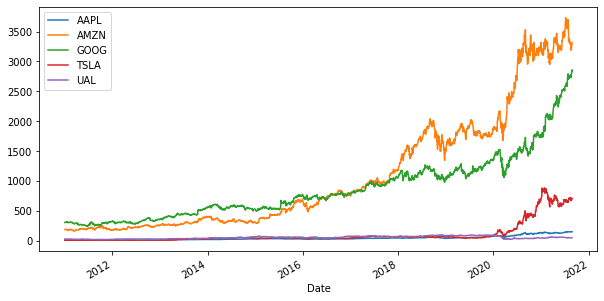

In [29]:
df.columns
# df['Adj Close']
df['Close'].plot(kind='line', figsize=(10,5))

# EDA


In [30]:
# df['Close'].head()

In [32]:
df['Close'].idxmax()

AAPL   2021-08-16
AMZN   2021-07-08
GOOG   2021-08-25
TSLA   2021-01-26
UAL    2018-11-30
dtype: datetime64[ns]

In [34]:
df['Close'].idxmin()

AAPL   2011-06-20
AMZN   2011-03-17
GOOG   2011-06-24
TSLA   2011-02-23
UAL    2011-11-23
dtype: datetime64[ns]

### Returns for each stock. 
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [35]:
returns=pd.DataFrame()

In [36]:
for tick in tickers:
    returns[tick+ ' Return'] = df['Close'][tick].pct_change()

In [45]:
returns.head()

,TSLA Return,AAPL Return,AMZN Return,UAL Return,GOOG Return
Date,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.001878,0.005219,0.004288,0.015917,-0.003690
2011-01-05,0.005999,0.008180,0.013026,-0.007051,0.011543
2011-01-06,0.039135,-0.000808,-0.008324,0.015779,0.007273
2011-01-07,0.012912,0.007161,-0.001991,0.007767,0.004792


In [59]:
import seaborn as sns 
from scipy.stats import norm , lognorm
sns.set(style='ticks', palette='bright')

std on  2011 : 0.016520540599711052


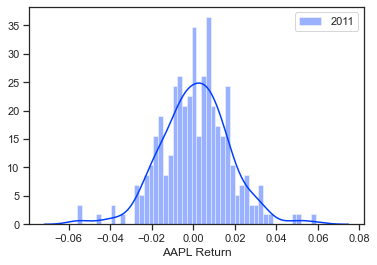

std on  2012 : 0.018619426433532992


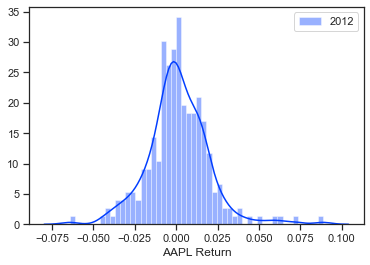

std on  2013 : 0.017912154609349074


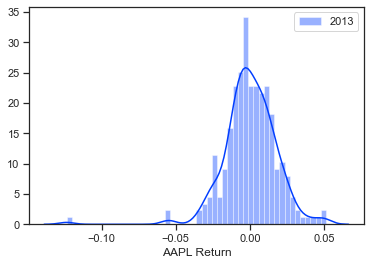

std on  2014 : 0.013649005251485


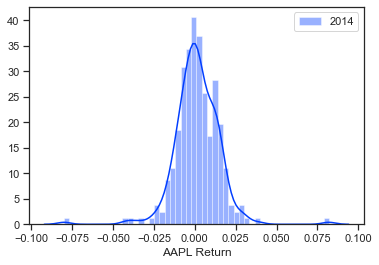

std on  2015 : 0.01686380649484143


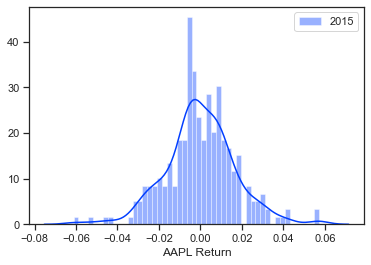

std on  2016 : 0.014751050291686572


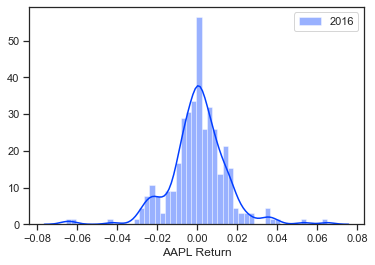

std on  2017 : 0.011156585862184


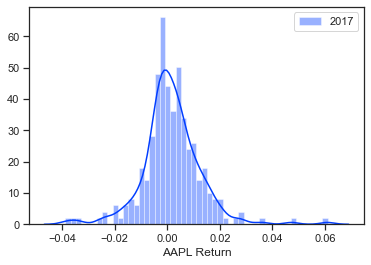

std on  2018 : 0.018108987914698706


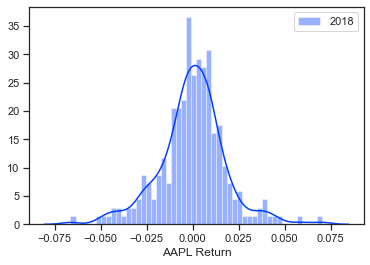

std on  2019 : 0.01652499636216477


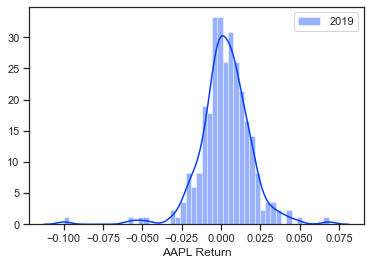

std on  2020 : 0.02942333509053713


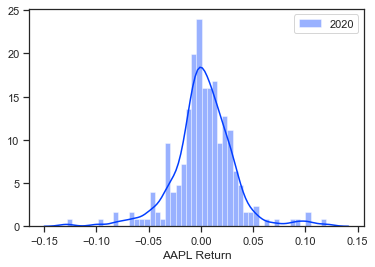

std on  2021 : 0.01622344704620691


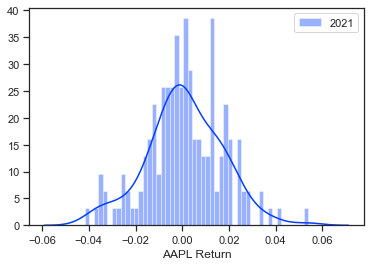

In [88]:
for y in range(2011,2022):
    sns.distplot(returns[returns.index.year==y]['AAPL Return'][1:], bins=50, label=str(y))
    print('std on ', str(y),':', returns[returns.index.year==y]['AAPL Return'][1:].std())
    plt.legend()
    plt.show()

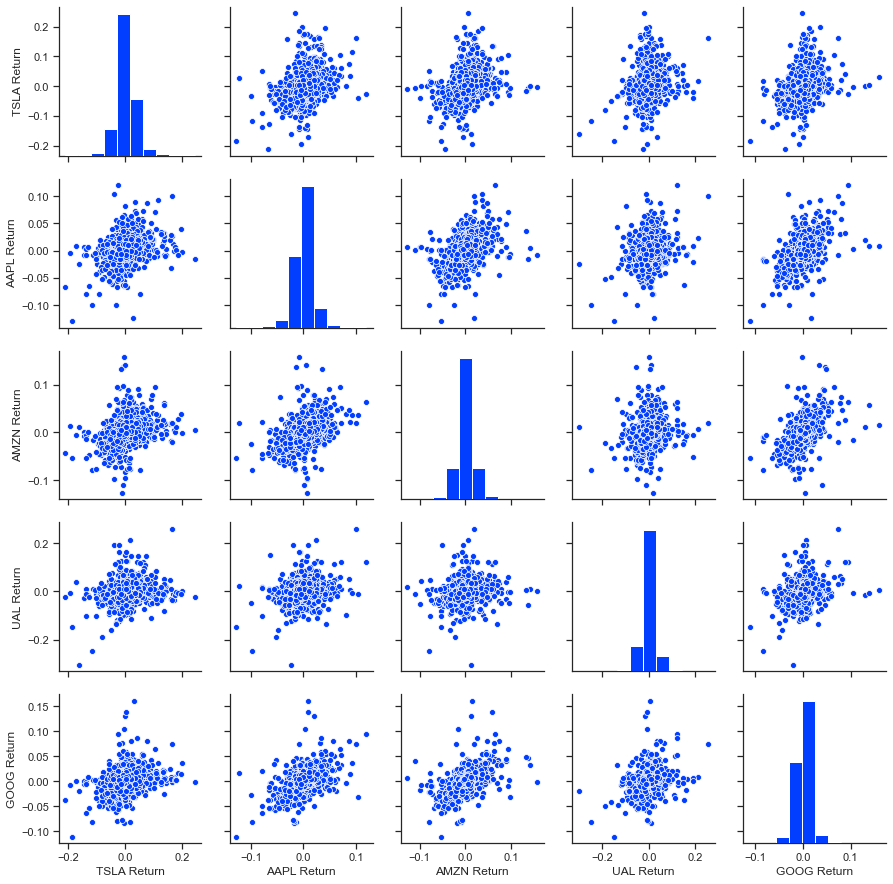

In [89]:
import seaborn as sns
sns.set(style='ticks', palette='bright')
sns.pairplot(returns[1:])

<AxesSubplot:>

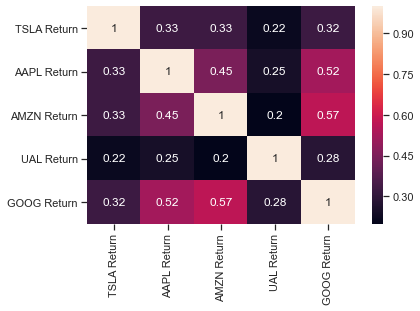

In [94]:
sns.heatmap(returns[1:].corr(), annot=True)

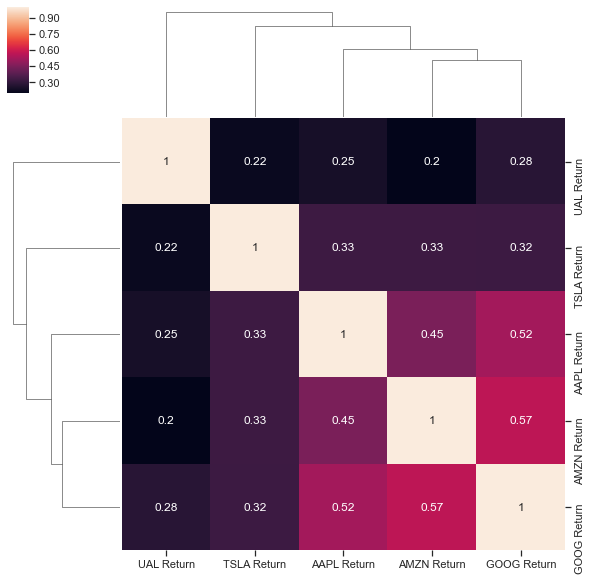

In [95]:
sns.clustermap(returns[1:].corr(), annot=True)

In [103]:
100*returns.std().sort_values()

GOOG Return    1.621192
AAPL Return    1.783921
AMZN Return    1.968768
UAL Return     3.036762
TSLA Return    3.488560
dtype: float64

In [131]:
for tick in range (len(tickers)): 
    print(tickers[tick],'\t',returns.idxmin()[tick].date(), '\t',round(returns.min()[tick],2)*100)


TSLA 	 2020-09-08 	 -21.0
AAPL 	 2020-03-16 	 -13.0
AMZN 	 2011-10-26 	 -13.0
UAL 	 2020-03-18 	 -30.0
GOOG 	 2020-03-16 	 -11.0


In [132]:
for tick in range (len(tickers)): 
    print(tickers[tick],'\t',returns.idxmax()[tick].date(), '\t',round(returns.max()[tick],2)*100)

TSLA 	 2013-05-09 	 24.0
AAPL 	 2020-03-13 	 12.0
AMZN 	 2012-04-27 	 16.0
UAL 	 2020-03-24 	 26.0
GOOG 	 2015-07-17 	 16.0


In [147]:
returns.std().sort_values()

GOOG Return    0.016212
AAPL Return    0.017839
AMZN Return    0.019688
UAL Return     0.030368
TSLA Return    0.034886
dtype: float64

<AxesSubplot:>

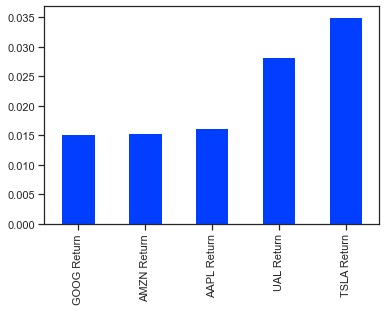

In [148]:
returns[returns.index.year==2021].std().sort_values().plot.bar()

<AxesSubplot:xlabel='GOOG Return'>

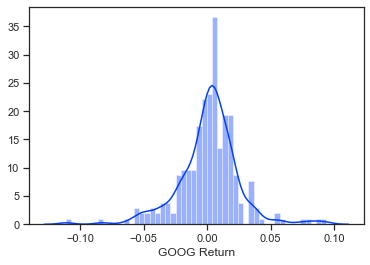

In [138]:
sns.distplot(returns[returns.index.year==2020]['GOOG Return'], bins=50)

<AxesSubplot:xlabel='TSLA Return'>

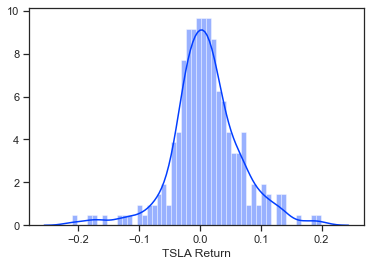

In [140]:
sns.distplot(returns[returns.index.year==2020]['TSLA Return'], bins=50)

<AxesSubplot:xlabel='AAPL Return'>

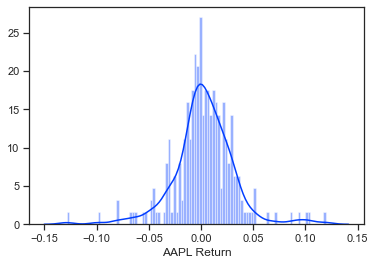

In [141]:
sns.distplot(returns[returns.index.year==2020]['AAPL Return'], bins=100)

<AxesSubplot:xlabel='AMZN Return'>

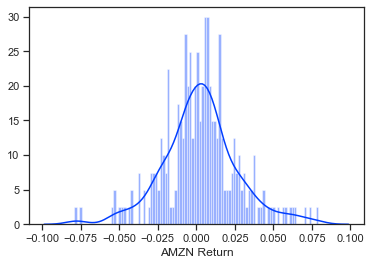

In [142]:
sns.distplot(returns[returns.index.year==2020]['AMZN Return'], bins=100)

<AxesSubplot:xlabel='UAL Return'>

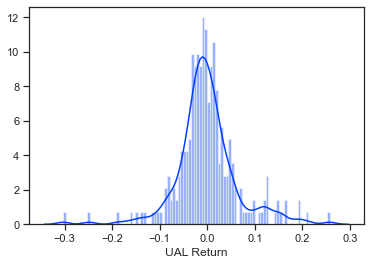

In [143]:
sns.distplot(returns[returns.index.year==2020]['UAL Return'], bins=100)

____
# More Visualization


In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

(14975.0, 18864.0)

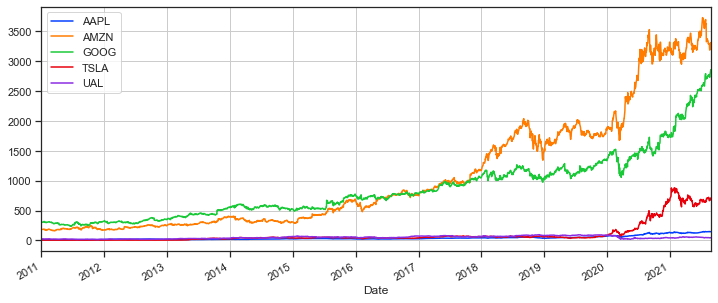

In [146]:
df['Close'].plot(kind='line', figsize=(12,5))
plt.grid('on')
plt.xlim(['2011-01-01', '2021-08-25'])

## Moving Averages


(17532.0, 18900.0)

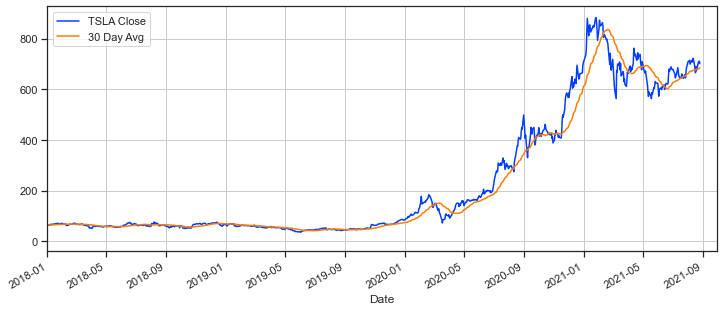

In [156]:
df['Close']['TSLA'].plot(kind='line', figsize=(12,5), label='TSLA Close')
df['Close']['TSLA'].rolling(window=30).mean().plot(kind='line', figsize=(12,5), label='30 Day Avg')
plt.legend()
plt.grid('on')
plt.xlim(['2018-01-01', '2021-09-30'])

(14975.0, 18864.0)

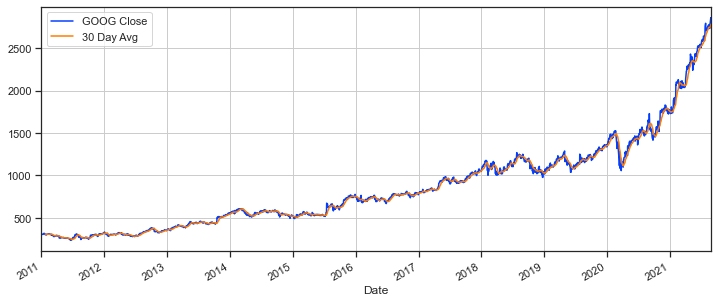

In [161]:
df['Close']['GOOG'].plot(kind='line', figsize=(12,5), label='GOOG Close')
df['Close']['GOOG'].rolling(window=15).mean().plot(kind='line', figsize=(12,5), label='30 Day Avg')
plt.legend()
plt.grid('on')
plt.xlim(['2011-01-01', '2021-08-25'])

** Create a heatmap of the correlation between the stocks Close Price.**

(5.0, 0.0)

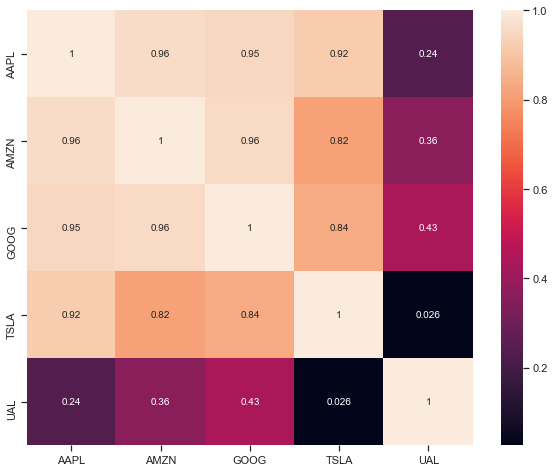

In [162]:
plt.figure(figsize=(10,8))
sns.heatmap(df['Close'].corr(), annot=True)
plt.ylim([5,0])



** Optional: Use seaborn's clustermap to cluster the correlations together:**

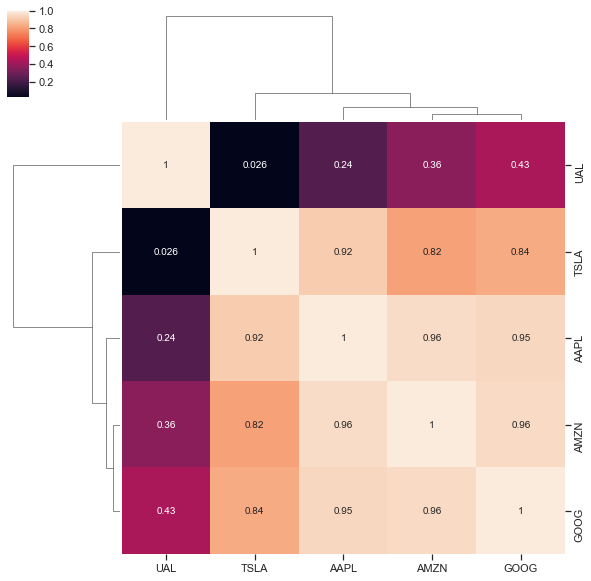

In [163]:
# plt.figure(figsize=(10,8))
sns.clustermap(df['Close'].corr(), annot=True)
# plt.ylim([5,0])
# 

# Done
